# Preparation et analyse des données

## Chargement et exploration des données

### Chargement des données

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator

In [2]:
# load the dataset
uduma_records = pd.read_csv('../dataset/Uduma_sample_data.csv')
# print the first few rows
uduma_records.head()

,"point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes"
0,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
1,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
2,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
3,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
4,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."


Lors de du chargement des données on se rend compte que les données sont combinées dans une seule colonne. Il nous faudra séparer les données par colonne

In [3]:
# print column names
uduma_records.columns

Index(['point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes'], dtype='object')

In [4]:
# Split the data into columns
uduma_records = uduma_records.iloc[:, 0].str.split(',', expand=True).rename(columns={
    0: 'point_name',
    1: 'commune',
    2: 'village',
    3: 'latitude',
    4: 'longitude',
    5: 'installation_date',
    6: 'meter_type',
    7: 'connection_type',
    8: 'status',
    9: 'reading_date',
    10: 'meter_index',
    11: 'revenue_fcfa',
    12: 'recorded_by',
    13: 'notes'
})

In [5]:
uduma_records

,point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes
0,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-01-15,47850,9500,Amadou Traoré,
1,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-02-15,47869,9500,Amadou Traoré,
2,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-03-15,47889,10000,Amadou Traoré,
3,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-04-15,47908,9500,Amadou Traoré,
4,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-05-15,47930,11000,Amadou Traoré,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-03-16,33218,10000,Adama Coulibaly,
101,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-04-16,33236,9000,Adama Coulibaly,
102,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-05-16,33256,10000,Adama Coulibaly,
103,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-06-16,33274,9000,Adama Coulibaly,


In [6]:
# check the type of each column in the dataframe
uduma_records.dtypes

point_name           object
commune              object
village              object
latitude             object
longitude            object
installation_date    object
meter_type           object
connection_type      object
status               object
reading_date         object
meter_index          object
revenue_fcfa         object
recorded_by          object
notes                object
dtype: object

Toutes les colonnes du dataset sont de type `object`. Cela signifie qu'elles contiennent des données textuelles ou des catégories. Il peut être nécessaire de les convertir en types appropriés (par exemple, datetime pour les dates) avant de procéder à une analyse plus approfondie.

### Attribution des types appropriés

In [7]:

# point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes'

# On va créer une map pour chaque colonne et son type de donnée approprié
dtype_map = {
    'point_name': 'category',
    'commune': 'category',
    'village': 'category',
    'latitude': 'float64',
    'longitude': 'float64',
    'installation_date': 'datetime64[ns]',
    'meter_type': 'category',
    'connection_type': 'category',
    'status': 'category',
    'reading_date': 'datetime64[ns]',
    'meter_index': 'int64',
    'revenue_fcfa': 'float64',
    'recorded_by': 'category',
    'notes': 'category'
}

# On va appliquer ce map pour changer le type de chaque colonne
for column, dtype in dtype_map.items():
    uduma_records[column] = uduma_records[column].astype(dtype)
    
# check the type of each column in the dataframe
uduma_records.dtypes


point_name                 category
commune                    category
village                    category
latitude                    float64
longitude                   float64
installation_date    datetime64[ns]
meter_type                 category
connection_type            category
status                     category
reading_date         datetime64[ns]
meter_index                   int64
revenue_fcfa                float64
recorded_by                category
notes                      category
dtype: object

## Détection d'erreurs, anomalies et/valeurs aberrantes

In [8]:
# 2. Détection d'anomalies logiques (valeurs négatives)
negative_revenues = uduma_records[uduma_records['revenue_fcfa'] < 0]

if not negative_revenues.empty:
    print("--- Anomalies logiques détectées (revenu négatif) ---")
    print(negative_revenues[['point_name', 'reading_date', 'revenue_fcfa']])
else:
    print("Aucun revenu négatif n'a été trouvé.")

--- Anomalies logiques détectées (revenu négatif) ---
             point_name reading_date  revenue_fcfa
97  Borne Fontaine Kita   2024-07-06       -8500.0


In [9]:
# On ne considère que les valeurs positives pour le calcul du Z-score
uduma_records = uduma_records[uduma_records['revenue_fcfa'] >= 0]
# Calculer la moyenne et l'écart-type
mean_positive_revenue = uduma_records['revenue_fcfa'].mean()
std_positive_revenue = uduma_records['revenue_fcfa'].std()

In [10]:
# --- 2. Visualisation de la méthode du Z-score ---

print("\n--- Visualisation des outliers (méthode du Z-score) ---")

# Calculer le Z-score pour chaque valeur de revenu
uduma_records['z_score_revenue'] = (uduma_records['revenue_fcfa'] - mean_positive_revenue) / std_positive_revenue

# Définir un seuil (généralement 3) pour les outliers
uduma_records['is_outlier_zscore'] = np.abs(uduma_records['z_score_revenue']) > 3

outliers_zscore = uduma_records[np.abs(uduma_records['z_score_revenue']) > 3]

if not outliers_zscore.empty:
    print(f"\nUne ou plusieurs valeurs aberrantes ont été trouvées et seront supprimées :")
    print(outliers_zscore[['point_name', 'reading_date', 'revenue_fcfa', 'z_score_revenue']])
else:
    print("\nAucune valeur aberrante n'a été trouvée avec la méthode du Z-score. Le jeu de données reste inchangé.")



--- Visualisation des outliers (méthode du Z-score) ---

Aucune valeur aberrante n'a été trouvée avec la méthode du Z-score. Le jeu de données reste inchangé.


C:\Users\ibrao\AppData\Local\Temp\ipykernel_34632\2294220238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uduma_records['z_score_revenue'] = (uduma_records['revenue_fcfa'] - mean_positive_revenue) / std_positive_revenue
C:\Users\ibrao\AppData\Local\Temp\ipykernel_34632\2294220238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uduma_records['is_outlier_zscore'] = np.abs(uduma_records['z_score_revenue']) > 3


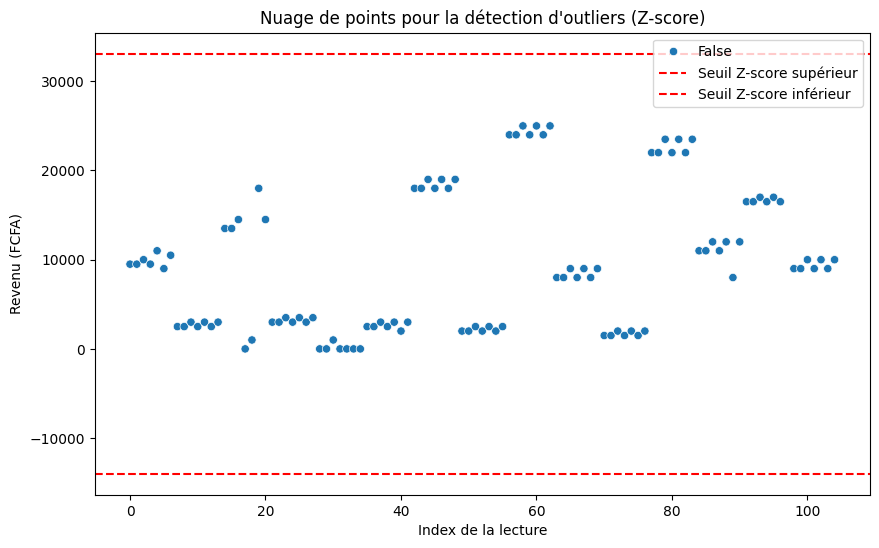

In [11]:
# Nuage de points pour visualiser les outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=uduma_records.index, y='revenue_fcfa', hue='is_outlier_zscore', data=uduma_records)
plt.axhline(mean_positive_revenue + 3 * std_positive_revenue, color='red', linestyle='--', label='Seuil Z-score supérieur')
plt.axhline(mean_positive_revenue - 3 * std_positive_revenue, color='red', linestyle='--', label='Seuil Z-score inférieur')
plt.title('Nuage de points pour la détection d\'outliers (Z-score)')
plt.xlabel('Index de la lecture')
plt.ylabel('Revenu (FCFA)')
plt.legend()
plt.show()

## Calculs de KPIs basiques

Conversion de la colonne de date et création de la colonne 'month'

In [12]:
uduma_records['month'] = uduma_records['reading_date'].dt.to_period('M')

C:\Users\ibrao\AppData\Local\Temp\ipykernel_34632\4162557883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uduma_records['month'] = uduma_records['reading_date'].dt.to_period('M')


--- Nombre de points d'eau par commune/village ---
       commune            village  point_name
0      Blendio     Blendio Centre           1
1      Blendio           Bougouni           0
2      Blendio      Dioila Centre           0
3      Blendio       Finkolo Gare           0
4      Blendio             Garalo           0
..         ...                ...         ...
220  Yanfolila           Pimperna           0
221  Yanfolila   Selingué Barrage           0
222  Yanfolila            Sikasso           0
223  Yanfolila  Wassoulou Village           0
224  Yanfolila          Yanfolila           1

[225 rows x 3 columns]


C:\Users\ibrao\AppData\Local\Temp\ipykernel_34632\1703433051.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  points_par_location = uduma_records.groupby(['commune', 'village'])['point_name'].nunique().reset_index()


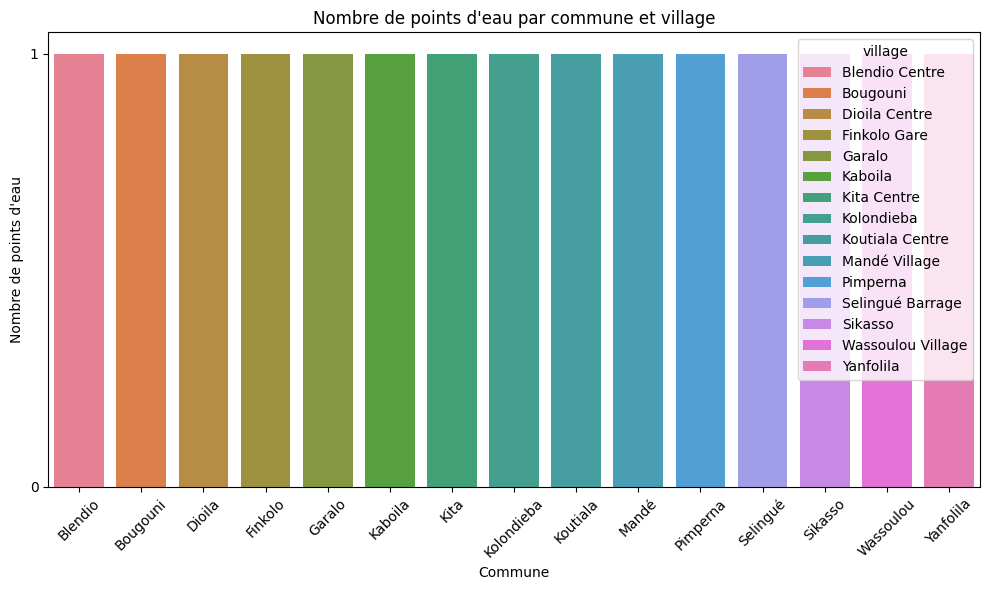

In [13]:
# --- 2. Analyses et graphiques des KPIs ---

# KPI 1 : Nombre total de points d'eau par commune/village
print("--- Nombre de points d'eau par commune/village ---")
points_par_location = uduma_records.groupby(['commune', 'village'])['point_name'].nunique().reset_index()
print(points_par_location)

plt.figure(figsize=(10, 6))
sns.barplot(x='commune', y='point_name', data=points_par_location, hue='village', dodge=False)
plt.title('Nombre de points d\'eau par commune et village')
plt.xlabel('Commune')
plt.ylabel('Nombre de points d\'eau')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


--- Nombre de lectures par mois ---
     month  nombre_lectures
0  2024-01               15
1  2024-02               15
2  2024-03               15
3  2024-04               15
4  2024-05               15
5  2024-06               15
6  2024-07               14


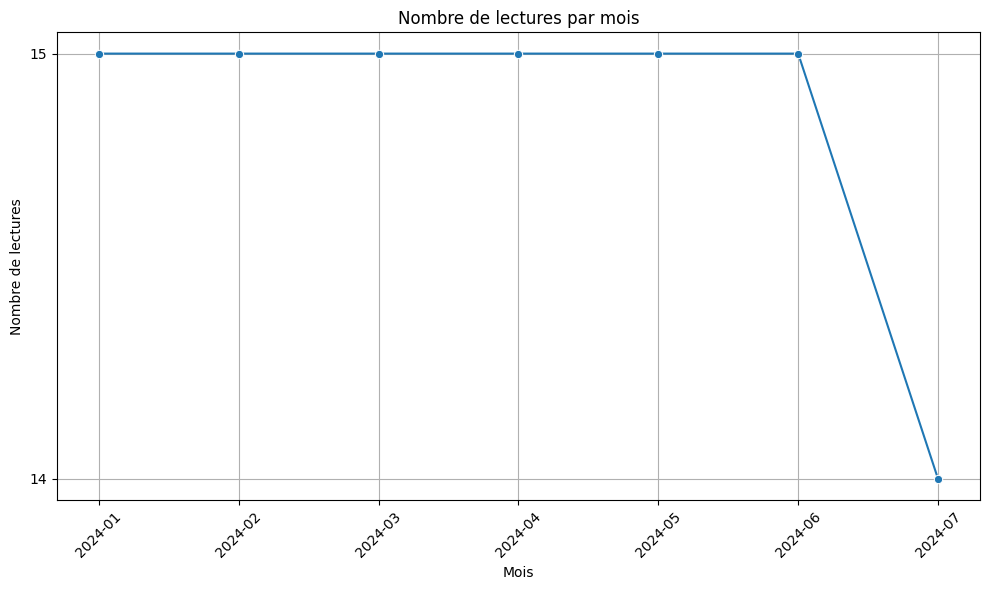

In [14]:
# KPI 2 : Nombre de lectures par mois (complétude)
print("\n--- Nombre de lectures par mois ---")
lectures_par_mois = uduma_records['month'].value_counts().sort_index().reset_index()
lectures_par_mois.columns = ['month', 'nombre_lectures']
print(lectures_par_mois)

plt.figure(figsize=(10, 6))
sns.lineplot(x=lectures_par_mois['month'].astype(str), y='nombre_lectures', data=lectures_par_mois, marker='o')
plt.title('Nombre de lectures par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de lectures')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


--- Évolution du revenu total par mois (FCFA) ---
     month  revenue_fcfa
0  2024-01      143000.0
1  2024-02      143000.0
2  2024-03      155000.0
3  2024-04      129500.0
4  2024-05      141500.0
5  2024-06      143500.0
6  2024-07      137500.0


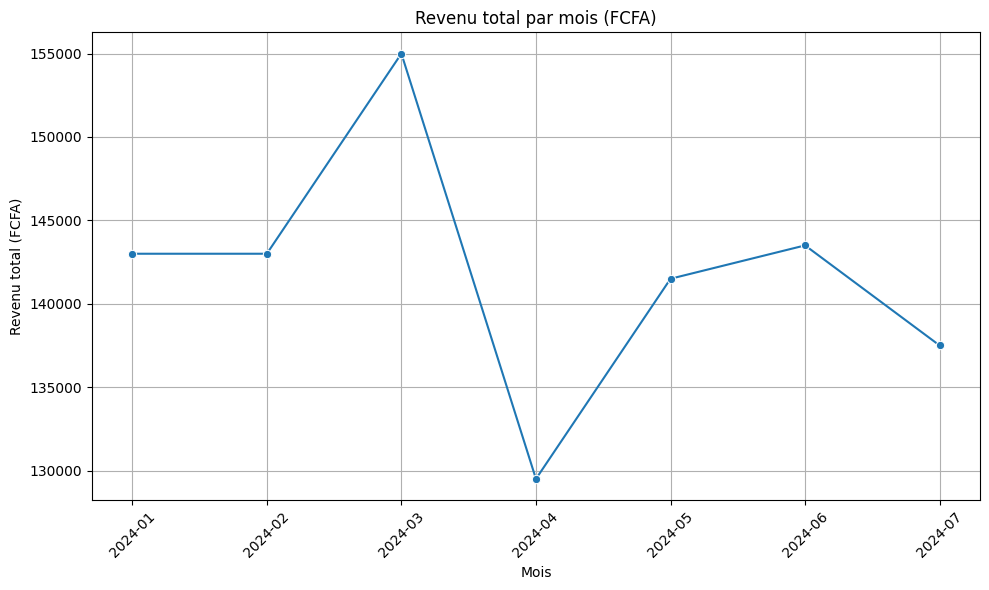

In [ ]:
# KPI 3 : Évolution du revenu total par mois
print("\n--- Évolution du revenu total par mois (FCFA) ---")
revenu_par_mois = uduma_records.groupby('month')['revenue_fcfa'].sum().reset_index()
print(revenu_par_mois)

plt.figure(figsize=(10, 6))
sns.lineplot(x=revenu_par_mois['month'].astype(str), y='revenue_fcfa', data=revenu_par_mois, marker='o')
plt.title('Revenu total par mois (FCFA)')
plt.xlabel('Mois')
plt.ylabel('Revenu total (FCFA)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


--- Consommation cumulée (différence de meter_index) ---
     month  consommation
0  2024-01           0.0
1  2024-02         286.0
2  2024-03         310.0
3  2024-04         259.0
4  2024-05         283.0
5  2024-06         287.0
6  2024-07         275.0


C:\Users\ibrao\AppData\Local\Temp\ipykernel_34632\2978381294.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uduma_records_sorted['consommation'] = uduma_records_sorted.groupby('point_name')['meter_index'].diff().fillna(0)


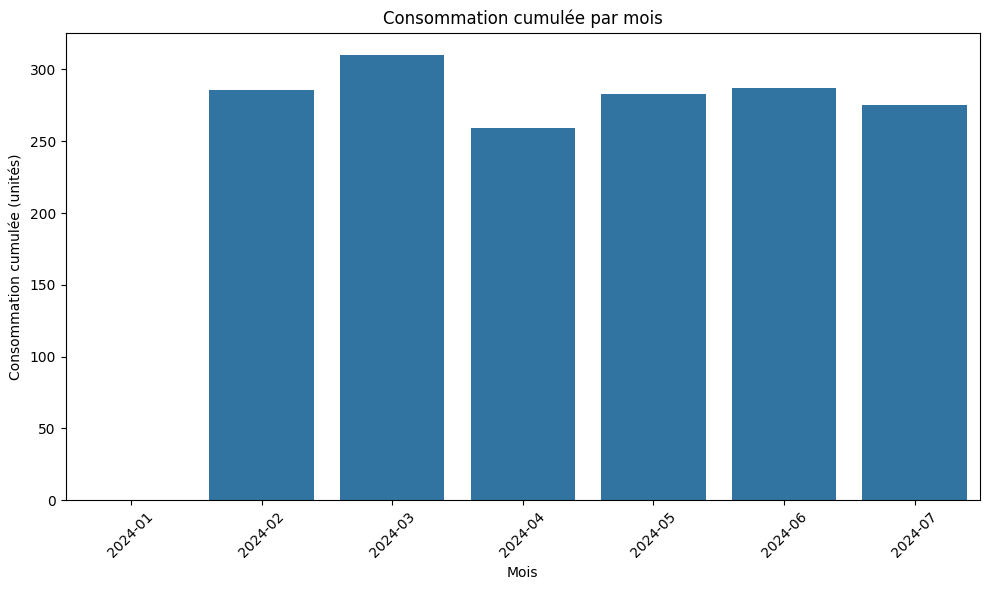

In [16]:
# KPI 4 : Consommation cumulée
print("\n--- Consommation cumulée (différence de meter_index) ---")
uduma_records_sorted = uduma_records.sort_values(by=['point_name', 'reading_date'])
uduma_records_sorted['consommation'] = uduma_records_sorted.groupby('point_name')['meter_index'].diff().fillna(0)
consommation_cumulee = uduma_records_sorted.groupby('month')['consommation'].sum().reset_index()
print(consommation_cumulee)

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='consommation', data=consommation_cumulee)
plt.title('Consommation cumulée par mois')
plt.xlabel('Mois')
plt.ylabel('Consommation cumulée (unités)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Taux d'activité ---
        status  pourcentage
0       active    93.333333
1     inactive     6.666667
2  maintenance     0.000000


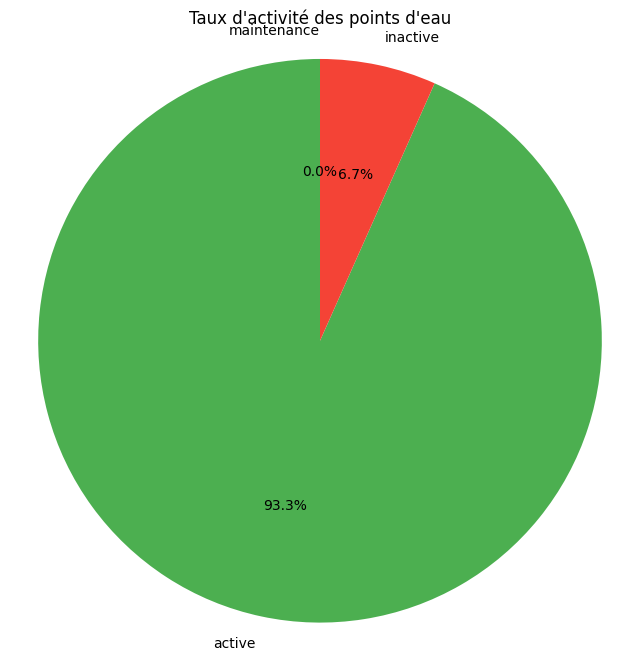

In [17]:
# KPI 5 : Taux d'activité
print("\n--- Taux d'activité ---")
total_points = uduma_records['point_name'].nunique()
status_counts = uduma_records.drop_duplicates(subset=['point_name'])['status'].value_counts()
taux_activite_uduma_records = (status_counts / total_points * 100).reset_index()
taux_activite_uduma_records.columns = ['status', 'pourcentage']
print(taux_activite_uduma_records)

plt.figure(figsize=(8, 8))
plt.pie(taux_activite_uduma_records['pourcentage'], labels=taux_activite_uduma_records['status'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Taux d\'activité des points d\'eau')
plt.axis('equal')
plt.show()

In [ ]:
uduma_records_sorted = uduma_records.sort_values(by=['point_name', 'reading_date'])
uduma_records_sorted['consommation'] = uduma_records_sorted.groupby('point_name', observed=True)['meter_index'].diff().fillna(0)
uduma_records_sorted.loc[uduma_records_sorted['consommation'] < 0, 'consommation'] = 0 # Correction pour les compteurs remis à zéro
uduma_records_sorted['month'] = uduma_records_sorted['reading_date'].dt.to_period('M')

# Filtrer les données pour les analyses, en se concentrant sur les lectures avec de la consommation.
df_anomalies = uduma_records_sorted[uduma_records_sorted['consommation'] > 0].copy()

C:\Users\ibrao\AppData\Local\Temp\ipykernel_34632\657574005.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uduma_records_sorted['consommation'] = uduma_records_sorted.groupby('point_name')['meter_index'].diff().fillna(0)


--- Détection d'anomalies sur la consommation mensuelle (Z-score & IQR) ---

--- Outliers détectés par Z-score : ---
Empty DataFrame
Columns: [point_name, reading_date, consommation, z_score]
Index: []

--- Outliers détectés par IQR : ---
Empty DataFrame
Columns: [point_name, reading_date, consommation]
Index: []


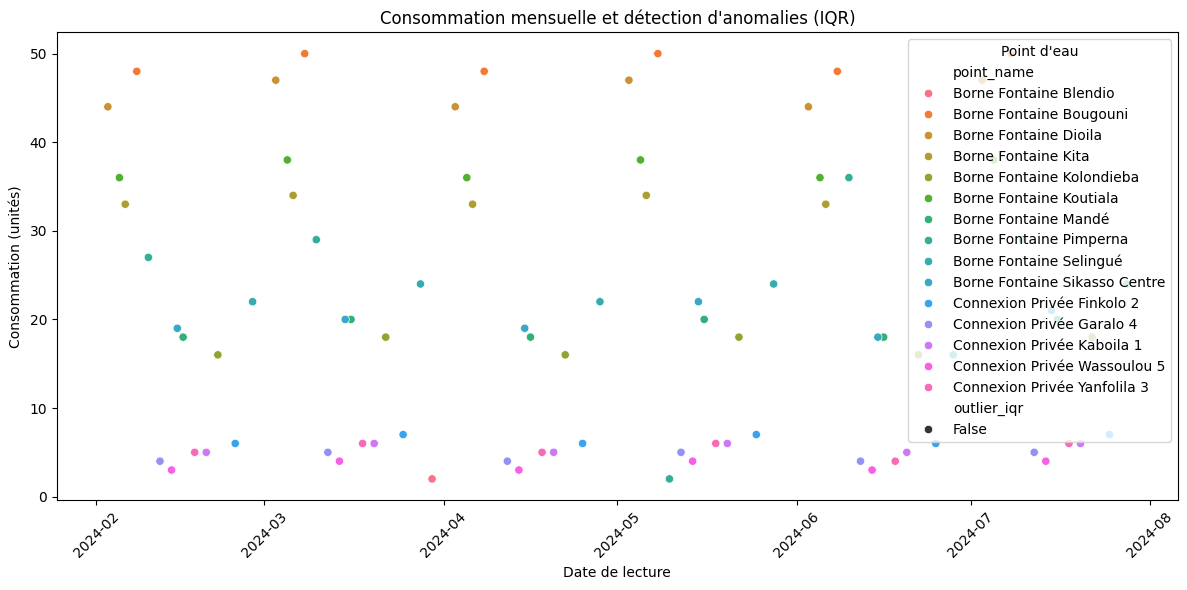

In [19]:
# --- 1. Détection d'anomalies statistiques sur la consommation mensuelle ---

print("--- Détection d'anomalies sur la consommation mensuelle (Z-score & IQR) ---")

# Calculer les métriques par point d'eau
consumption_stats = df_anomalies.groupby('point_name', observed=True)['consommation'].agg(['mean', 'std']).reset_index()
consumption_stats.rename(columns={'mean': 'mean_consommation', 'std': 'std_consommation'}, inplace=True)
df_anomalies = df_anomalies.merge(consumption_stats, on='point_name')

# Calculer le Z-score
df_anomalies['z_score'] = (df_anomalies['consommation'] - df_anomalies['mean_consommation']) / df_anomalies['std_consommation']

# Détecter les outliers avec le Z-score (seuil > 3 ou < -3)
df_anomalies['outlier_zscore'] = (df_anomalies['z_score'].abs() > 3)

# Calculer les seuils IQR
Q1 = df_anomalies['consommation'].quantile(0.25)
Q3 = df_anomalies['consommation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détecter les outliers avec l'IQR
df_anomalies['outlier_iqr'] = (df_anomalies['consommation'] < lower_bound) | (df_anomalies['consommation'] > upper_bound)

print("\n--- Outliers détectés par Z-score : ---")
print(df_anomalies[df_anomalies['outlier_zscore']][['point_name', 'reading_date', 'consommation', 'z_score']])

print("\n--- Outliers détectés par IQR : ---")
print(df_anomalies[df_anomalies['outlier_iqr']][['point_name', 'reading_date', 'consommation']])

# Visualisation des anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x='reading_date', y='consommation', hue='point_name', style='outlier_iqr', data=df_anomalies)
plt.title('Consommation mensuelle et détection d\'anomalies (IQR)')
plt.xlabel('Date de lecture')
plt.ylabel('Consommation (unités)')
plt.legend(title='Point d\'eau')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()